# K-NEAREST NEIGHBOURS
### Objective:
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/Zoo.csv")
df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# Data Preprocessing
# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
# Set plotting parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 500
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Impute missing values (though not needed in this case as there are no missing values)
si = SimpleImputer(strategy='mean')
df = pd.DataFrame(si.fit_transform(df), columns=df.columns)


In [ ]:
# Data Description
print(df.describe())

       animal name        hair    feathers        eggs        milk  \
count   101.000000  101.000000  101.000000  101.000000  101.000000   
mean     49.257426    0.425743    0.198020    0.584158    0.405941   
std      28.968829    0.496921    0.400495    0.495325    0.493522   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%      25.000000    0.000000    0.000000    0.000000    0.000000   
50%      49.000000    0.000000    0.000000    1.000000    0.000000   
75%      74.000000    1.000000    0.000000    1.000000    1.000000   
max      99.000000    1.000000    1.000000    1.000000    1.000000   

         airborne     aquatic    predator     toothed    backbone    breathes  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.237624    0.356436    0.554455    0.603960    0.821782    0.792079   
std      0.427750    0.481335    0.499505    0.491512    0.384605    0.407844   
min      0.000000    0.000000    0.000000    

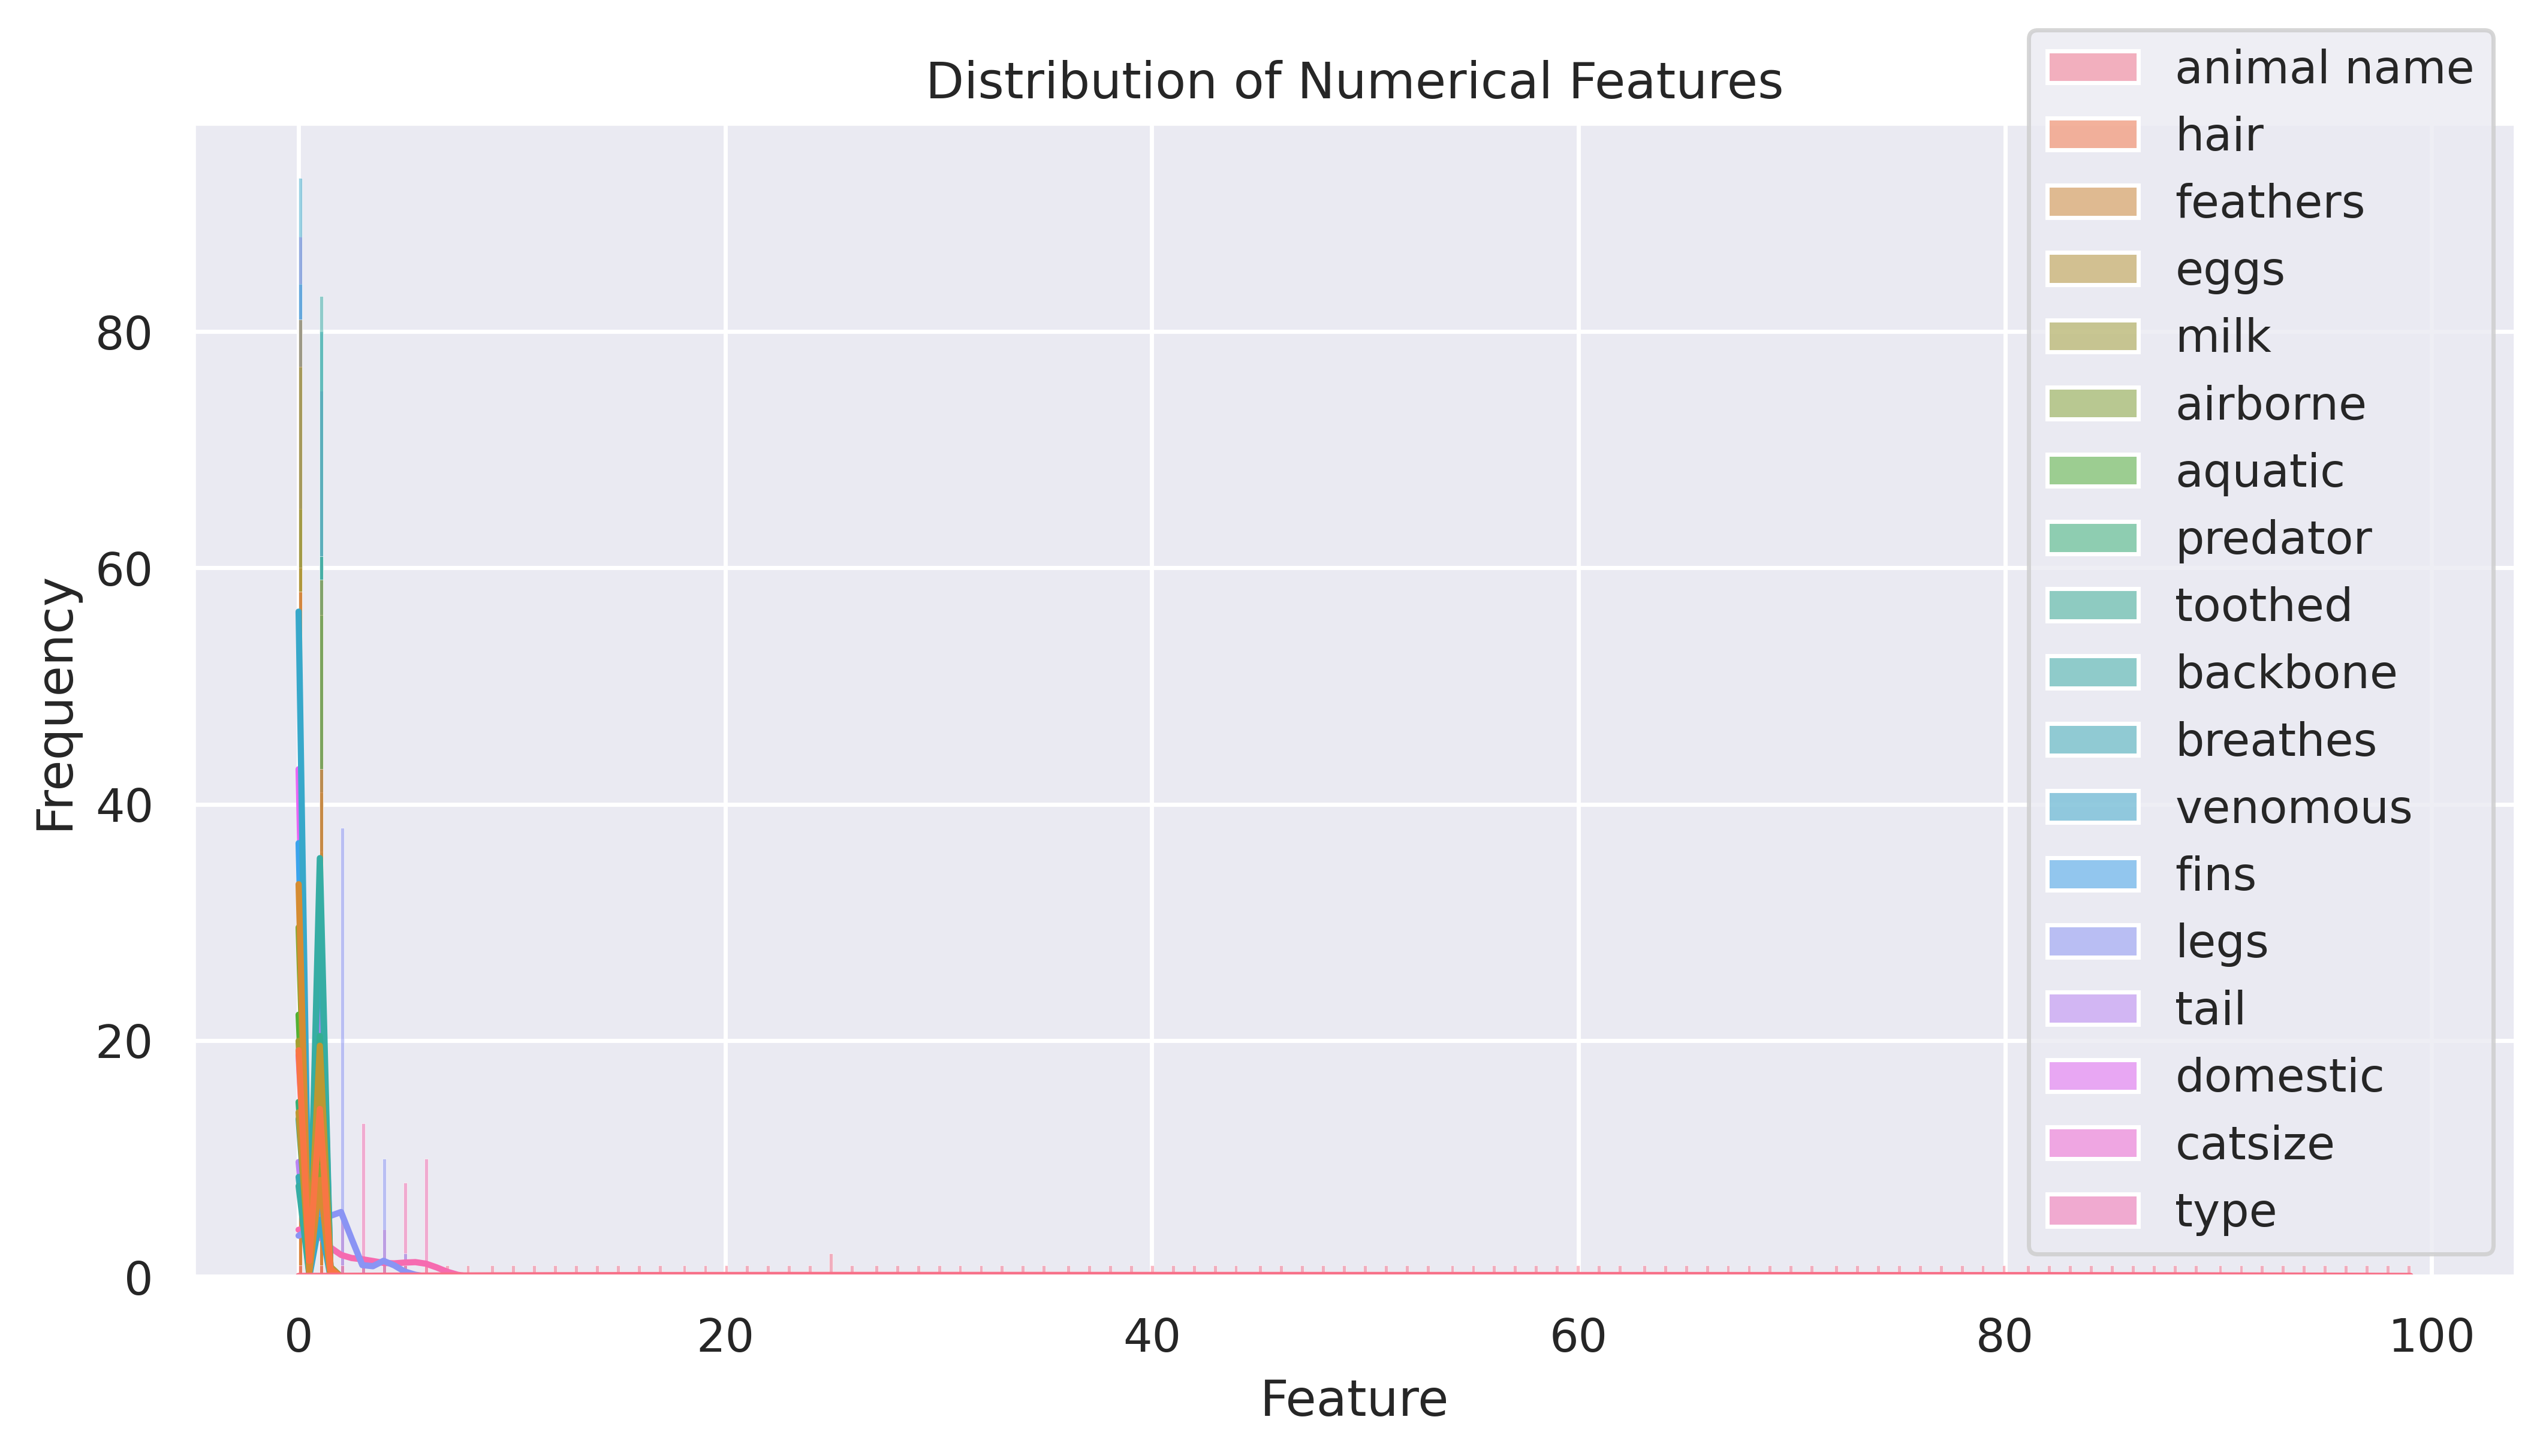

In [ ]:
# Visualization
sns.histplot(data=df, kde=True)
plt.title('Distribution of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.show()


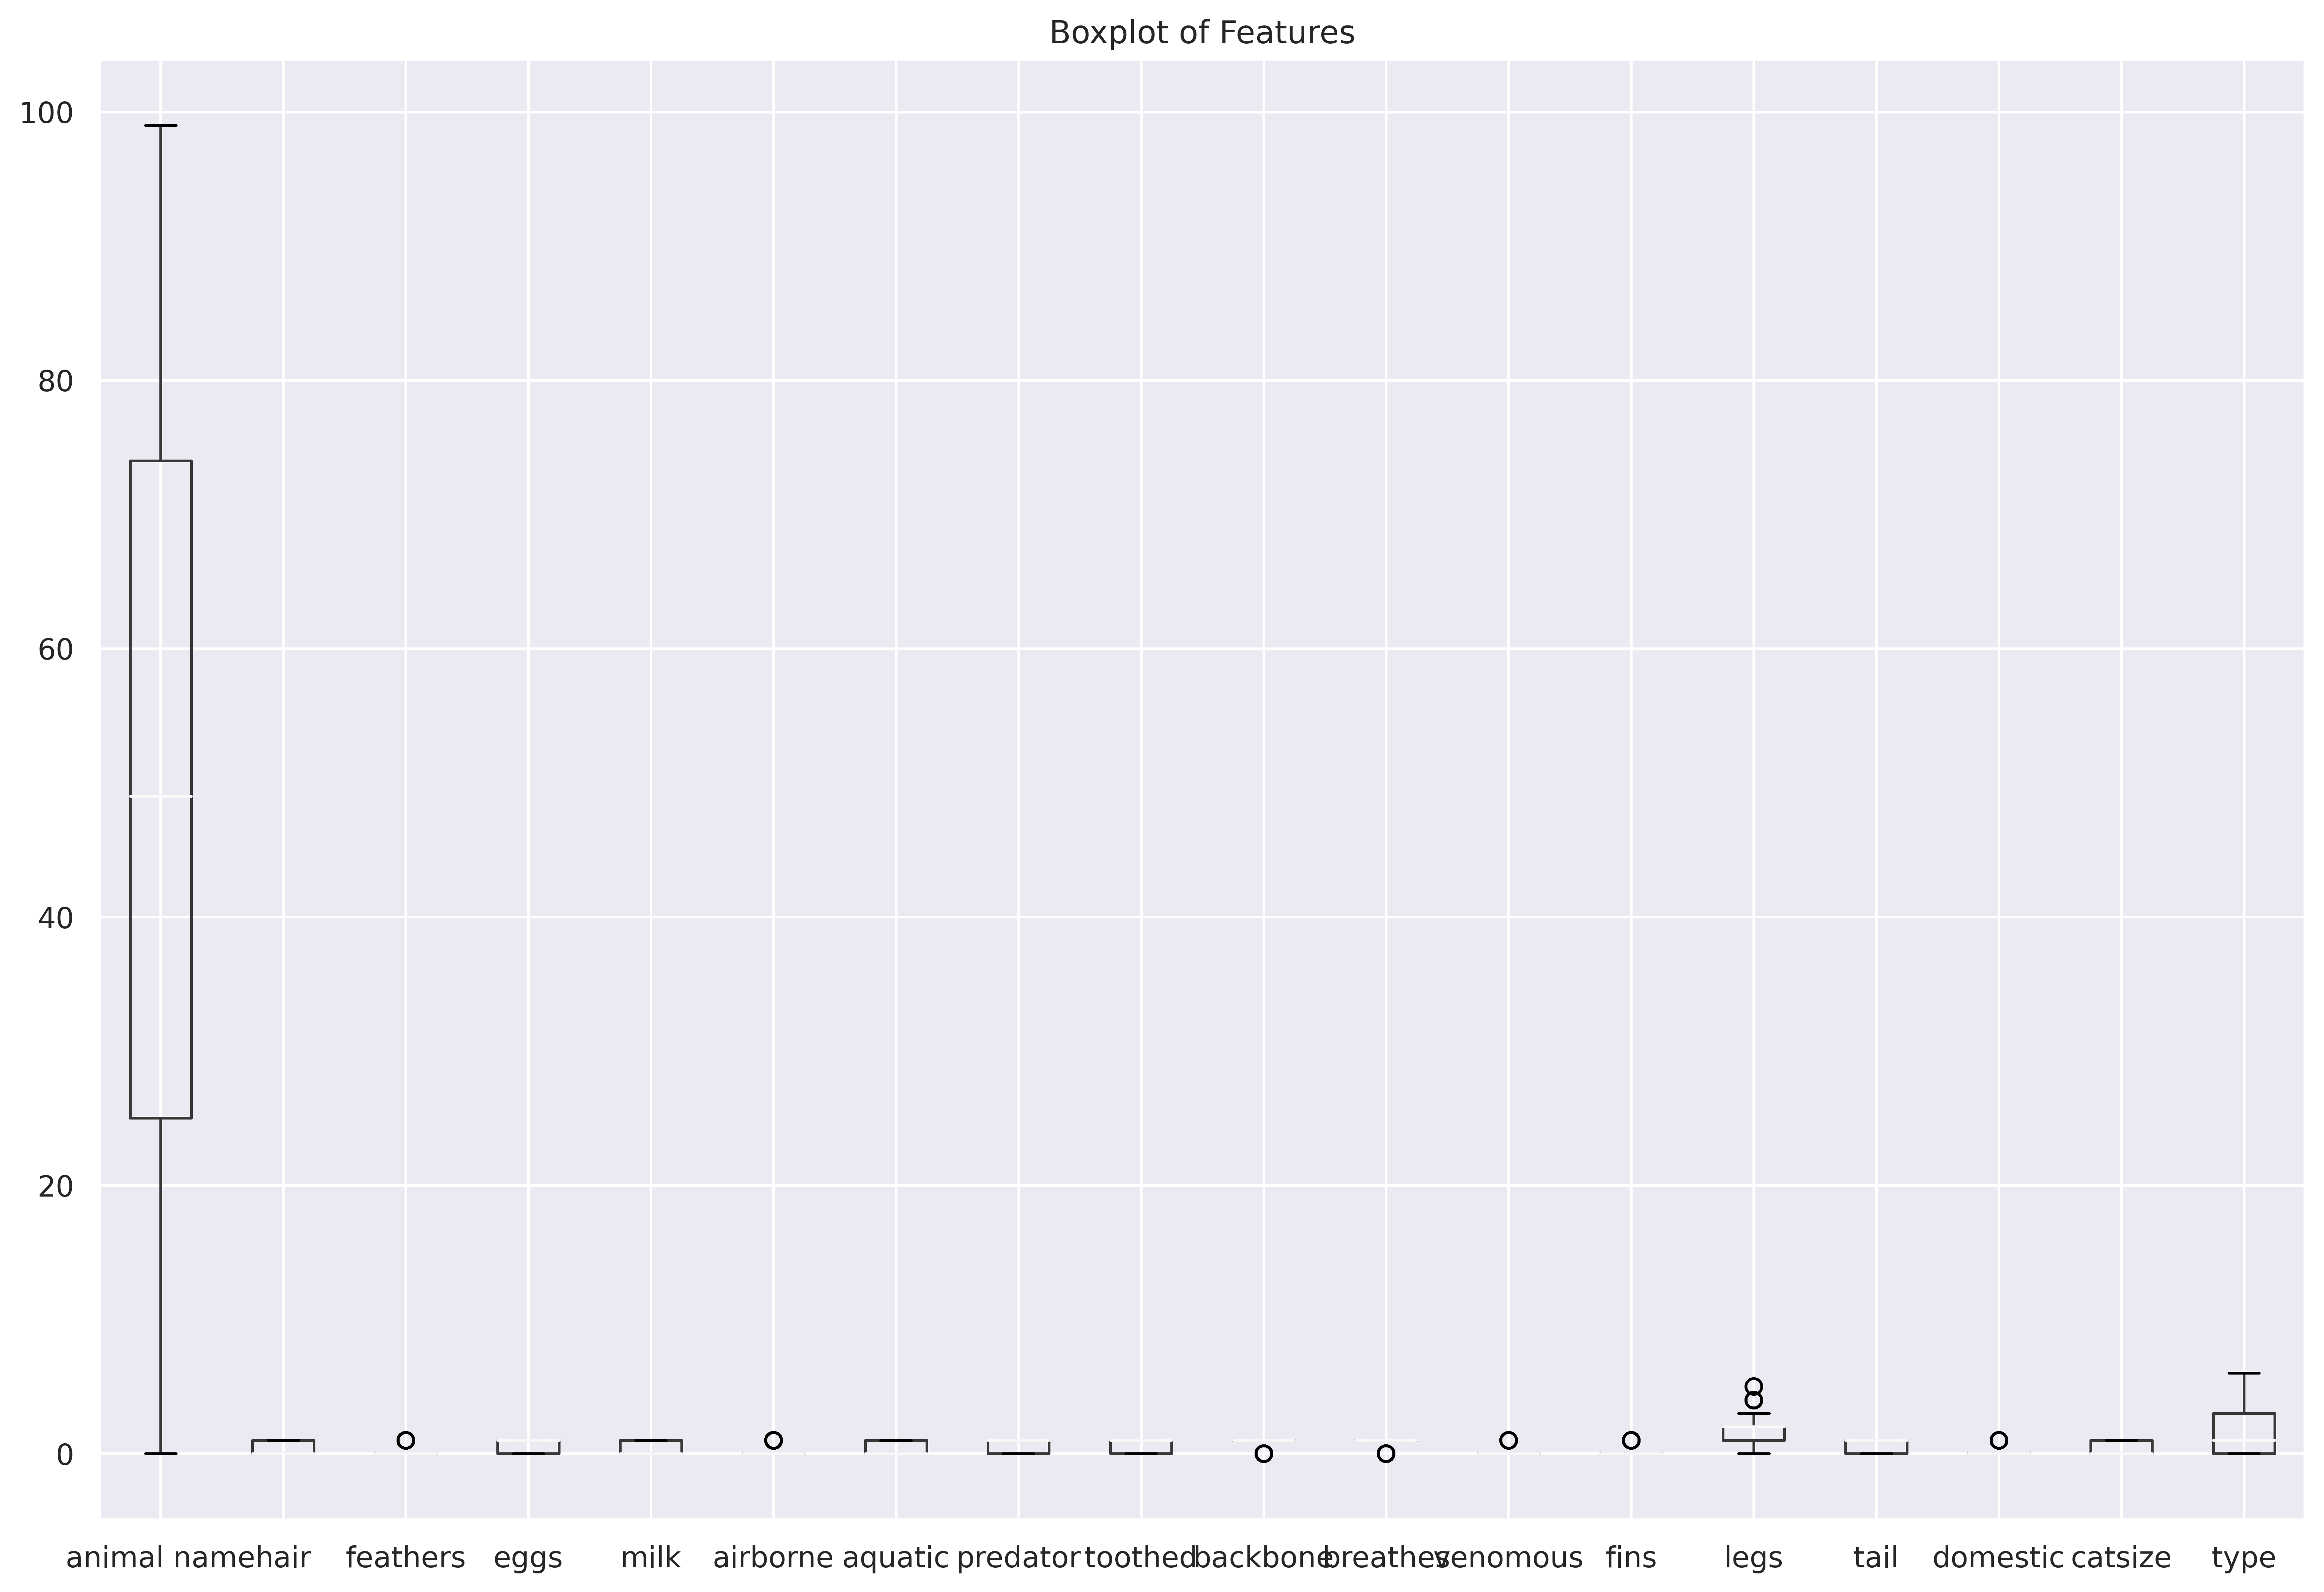

In [ ]:
df.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features')
plt.show()

In [ ]:
# Prepare data for training
x = df.iloc[:, :-1]  # Features
y = df['type']       # Target

In [ ]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [ ]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:

# Predictions and Evaluation
y_pred = knn.predict(x_test)
print("Training accuracy:", knn.score(x_train, y_train))
print("Testing accuracy:", knn.score(x_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training accuracy: 0.975
Testing accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


# Interview Questions:

1)What are the key hyperparameters in KNN?
   - **`n_neighbors`**: Number of neighbors to consider.
   - **`weights`**: Weighting of neighbors (`uniform` or `distance`).
   - **`algorithm`**: Search algorithm (`auto`, `ball_tree`, `kd_tree`, `brute`).
   - **`p`**: Power parameter for distance metrics (1 for Manhattan, 2 for Euclidean).
   - **`leaf_size`**: Affects speed and memory for `ball_tree` and `kd_tree`.

2)What distance metrics can be used in KNN?
   - **Euclidean**: Straight-line distance.
   - **Manhattan**: Grid-like distance.
   - **Minkowski**: Generalized distance (Euclidean if `p=2`, Manhattan if `p=1`).
   - **Chebyshev**: Greatest coordinate difference.
   - **Hamming**: Categorical data distance.
   - **Cosine Similarity**: Measures angle between vectors.